## Contents
* [Intro](#intro)
* [Setup work](#prep)
* [Indexing](#index)
* [Instantiation](#instantiate)
    * [Empty DF](#empty_df)
    * [From dict](#from_dict)
    * [Updating values](#updatecells)
    * [Concatenating](#concat)
    * [Chunking: piece by piece](#chunking)
* [Multiindexing](#multiindex)
    * [Generating multi index: adding a level](#multi_gen)
    * [Accessing MultiIndex](#multi_access)
    * [Custom columns initialization](#initcols)
    * [Concatenating Multiinindexed and fla](#multi_concat)
    * [Looping through Multiindex](#multi_loop)
    * [Aggregations](#agg)
* [Yielding DFs: iterrows](#iterrows)
* [Rolling window](#roll)
* [Combining DFs](#comb)
     * [Horizontal concatenation](#hconcat)
     * [Vertical concatenation](#vconcat)
     * [Join](#join)
     * [Join multiple DFs](#multiple_join)
     * [Cartesian Product](#cartesianprod)
* [Working with lists](#lists)
     * [Creating columns of lists](#col_lists2)
     * [fillna with empty lists](#fillnalists)
     * [Collapsing whole DF in a list](#collapsetolist)
     * [Groupby to lists](#gbytolist)
* [Split Apply Aggregate](#splitapplyaggregate)
* [Categorical Data](#categorical)
    * [Instantiation](#category_instantiation)
        * [In DataFrame](#categ_instantiate_df)
    * [Use](#categ_use)
* [Dates](#dates)
    * [Imputation](#datesimputation)
    * [Adding days](#datesaddday)
* [Parsing/Casting](#parsing)
    * [to_numeric](#tonumeric)
* [I/O](#IO)
    * [Import](#import)
        * [Nested dictionaries](#in_nested_dict)
        * [Excel](#excel)
    * [Export](#export)
* [Analysis](#anal)
    * [Correlation Matrix](#corr)
* [Plot](#plot)
    * [Multiple plot]()
* [Testing and Good practices](#test)
    * [Test the mutation of the original DF if you need it](#testoriginal)
    * [Test the Index robustness to shuffling](#testindex)
* [Use Examples](#usecases)
    * [Function application](#functionapplication)
* [Development](#dev)
    * [Extending Pandas](#dev_extension)

In [1]:
import numpy as np
import pandas as pd

from numpy import array

In [2]:
print(f'pandas:\t{pd.__version__},\nnumpy:\t{np.__version__}')

pandas:	1.0.3,
numpy:	1.18.4


## <div id='intro'>Introduction</div> 

### about pandas
This nb collects my notes about **[pandas](https://pandas.pydata.org/)** library. It is one of the most important package in Python, quite like numpy, which relies on. IMHO for a Data Scientist pandas is almost a Python built-in. 

### why
Developing projects, you face many challenges and, most of the time, the solutions are quite similar. To reinvent such solution every time can be a good recall exercise, but I prefer to invest time in new problems, therefore it become mandatory to collect use cases merged with theory and references, and this is the result of such work.

## <div id='prep'>Preparation</div>

Here I just create some dataframe that I'll use later.

### <div id='ds'>Get Data</div>

In [37]:
ds_columns={
    0: 'airport_id',
    1: 'airport',
    2: 'city',
    3: 'country',
    4: 'IATA',
    5: 'ICAO',
    6: 'latitude',
    7: 'longitude',
    8: 'altitude',
    10: 'TZ',
    11: 'DST',
    12: 'TZ_tz',
    13: 'type',
    14: 'source',
}

In [39]:
# https://openflights.org/data.html
url = ds_url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat' 
df_airports = pd.read_csv(ds_url, names=list(ds_columns.values()))
df_airports.head(2)

,airport_id,airport,city,country,IATA,ICAO,latitude,longitude,altitude,TZ,DST,TZ_tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports


In [49]:
df = pd.DataFrame({
    's0': (np.random.rand(1000)*300).astype(int),
    's1': (np.random.rand(1000)*300).astype(int),
    's2': (np.random.rand(1000)*300).astype(int),
    's3': (np.random.rand(1000)*300).astype(int),
    's4': (np.random.rand(1000)*300).astype(int),
    's5': (np.random.rand(1000)*300).astype(int),
})
df.head()

,s0,s1,s2,s3,s4,s5
0,146,280,299,4,15,29
1,85,207,38,191,273,158
2,193,107,200,262,252,169
3,298,38,40,298,191,275
4,148,153,178,148,181,21


#### <div id='dtype'>define dtype</div>

In [4]:
uno = ['eolo', 'mammolo', 'pisolo', 'gongolo']
due = ['vento', 'infanzia', 'sonno', 'compiacenza']
tre = [0.2, 0.8, 0.5, 0.1]
df1 = pd.DataFrame({'uno': uno, 'due':due, 'tre':tre})
df1

,uno,due,tre
0,eolo,vento,0.2
1,mammolo,infanzia,0.8
2,pisolo,sonno,0.5
3,gongolo,compiacenza,0.1


#### <div id ='index'>Indexing</div>

**.loc**: through index

In [36]:
df.set_index('s0').loc[[0,1]]

,s1,s2,s3,s4,s5
s0,,,,,
0,3,228,50,227,92
0,252,281,135,252,193
0,37,66,133,258,149
0,270,29,12,291,118
0,24,47,134,246,91
1,72,201,176,173,256
1,228,177,178,149,20
1,88,54,37,151,114
1,269,23,268,265,279


**.iloc**: by order

In [34]:
df.set_index('s0').iloc[[0,1]]

,s1,s2,s3,s4,s5
s0,,,,,
0,3,228,50,227,92
51,144,184,209,289,216


### Prepare df

In [50]:
df.head()

,s0,s1,s2,s3,s4,s5
0,146,280,299,4,15,29
1,85,207,38,191,273,158
2,193,107,200,262,252,169
3,298,38,40,298,191,275
4,148,153,178,148,181,21


In [51]:
df1 = df[['s0', 's1']]
df1 = df1.sort_values(['s0', 's1'])
df1

,s0,s1
718,0,17
148,0,159
61,0,168
703,0,194
662,0,211
...,...,...
380,298,74
624,298,83
683,298,96
735,299,127


## <div id='instantiate'>Instantiation</div>
[```pandas.DataFrame```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

* [General Parsing Configuration, IO tools, pandas, official docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#general-parsing-configuration)

Here we define *a* as a *view* of a pandas DF, this means that it will be a sort of reference, instead of **a different object**.

In [52]:
a = df[:2]
a

,s0,s1,s2,s3,s4,s5
0,146,280,299,4,15,29
1,85,207,38,191,273,158


In [53]:
df[:2]

,s0,s1,s2,s3,s4,s5
0,146,280,299,4,15,29
1,85,207,38,191,273,158


When a is modified, df is modified too

In [54]:
a.loc[:, 's1'] = 0

/Users/anggia/opt/anaconda3/envs/py37ml/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [55]:
a

,s0,s1,s2,s3,s4,s5
0,146,0,299,4,15,29
1,85,0,38,191,273,158


In [56]:
df[:2]

,s0,s1,s2,s3,s4,s5
0,146,0,299,4,15,29
1,85,0,38,191,273,158


Nothing happens if you don't mutate the content, but the dataframe

In [57]:
a = a[:1]
a

,s0,s1,s2,s3,s4,s5
0,146,0,299,4,15,29


In [58]:
len(df)

1000

#### <div id='empty_df'>empty DF</div>

Only index

In [3]:
import pandas as pd
index = list(range(5))
df_empty = pd.DataFrame(index=index)
df_empty

""
0
1
2
3
4


Only comlumns

In [5]:
df_empty = pd.DataFrame(columns=['col1', 'col2'])
df_empty

,col1,col2


Only index and columns

In [7]:
index = list(range(5))
columns = ['col1', 'col2']
df_empty = pd.DataFrame(index=index, columns=columns)
df_empty

,col1,col2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


#### <div id='from_dict'>from dict</div>

Orient columns

In [18]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [ ]:
data = {'DF': [3, 2, 1, 0], 'schema': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

Orient index

In [19]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')

,0,1,2,3
row_1,3,2,1,0
row_2,a,b,c,d


#### <div id='updatecells'>update values</div>

Let's see how to update values in specific cells

Single cell: very easy

In [63]:
cells_idx = [9] # specific cells ids
df.loc[cells_idx, 's2']

9    293
Name: s2, dtype: int64

In [64]:
df.loc[cells_idx, 's2'] = 11
df.loc[cells_idx, 's2'] # check

9    11
Name: s2, dtype: int64

Alternatively you can use [```at()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html)

In [65]:
df.at[cells_idx, 's2'] = 117
df.loc[cells_idx, 's2'] # check

9    117
Name: s2, dtype: int64

Multiple cells

In [68]:
cells_idx = [1, 3, 5] # specific cells ids
df.loc[cells_idx, ['s2']]

,s2
1,38
3,40
5,270


In [72]:
df.loc[cells_idx, ['s2']] = np.array([0, 0, 0])[:, None]
df.loc[cells_idx, ['s2']]

,s2
1,0
3,0
5,0


#### <div id='initcols'>Custom columns initialization</div>

In [27]:
d1 = {
    'c1': [0,2],
}

desired_cols = ['c1', 'c2', 'c3']

pd.DataFrame(d1, columns=list( set(desired_cols).union(set(d1.keys())) ))

,c1,c2,c3
0,0,NaN,NaN
1,2,NaN,NaN


In [24]:
set(d1.keys())

{'c1'}

#### <div id='concat'>Contatenating</div>
The original df is preserved, during concatenation

In [19]:
a = pd.concat((a, df[:4]), axis=0)
a

,s0,s1,s2,s3,s4,s5
0,76,0,98,26,2,258
0,76,0,98,26,2,258
1,223,0,278,165,220,66
2,215,298,207,118,94,286
3,252,212,224,183,82,225


In [25]:
set(['c2']).union(set(d1.keys()))

{'c1', 'c2'}

In [22]:
set(['c2'])

{'c2'}

In [20]:
a.loc[:, 's1'] = 0

In [21]:
a

,s0,s1,s2,s3,s4,s5
0,76,0,98,26,2,258
0,76,0,98,26,2,258
1,223,0,278,165,220,66
2,215,0,207,118,94,286
3,252,0,224,183,82,225


In [22]:
df[:5] # not mutated

,s0,s1,s2,s3,s4,s5
0,76,0,98,26,2,258
1,223,0,278,165,220,66
2,215,298,207,118,94,286
3,252,212,224,183,82,225
4,76,100,74,94,224,276


#### <div id='chunking'>Chunking: piece by piece</div>
*```chunksize```*

You can read data in chunks, specifying the chunk size as rows to read. 
It can be particularly useful when you deal with large datasets. More about it and other configurations in [General parsing configuration](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#general-parsing-configuration).

dataset retrieved [here](#ds)

In [1]:
import pandas as pd

In [31]:
df_chunked = pd.read_csv(ds_url, chunksize=1, names=list(ds_columns.values()))


In [28]:
type(df_chunked)

pandas.io.parsers.TextFileReader

In [33]:
max_times = 1 # stop after 1 iteration
for partial_df in df_chunked:
    if max_times == 0: break
    max_times -= 1
    # 
    print(partial_df)
    

   airport_id                  airport          city    country IATA  ICAO  \
6           7       Narsarsuaq Airport  Narssarssuaq  Greenland  UAK  BGBW   
7           8  Godthaab / Nuuk Airport      Godthaab  Greenland  GOH  BGGH   

    latitude  longitude  altitude  TZ DST            TZ_tz     type  \
6  61.160500 -45.425999       112  -3   E  America/Godthab  airport   
7  64.190903 -51.678101       283  -3   E  America/Godthab  airport   

        source  
6  OurAirports  
7  OurAirports  


As we can see below, *partial_df* is a normal pd.DataFrame, that we can use for our typical data operations.

In [34]:
type(partial_df)

pandas.core.frame.DataFrame

In [36]:
partial_df

,airport_id,airport,city,country,IATA,ICAO,latitude,longitude,altitude,TZ,DST,TZ_tz,type,source
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


## <div id='multiindex'>Multiindexing</div>

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html  
Cookbook: https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#multiindexing

In [2]:
import pandas as pd

In [3]:
# https://openflights.org/data.html
url = ds_url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat' 


In [2]:
df = pd \
    .read_csv(ds_url, header=None) \
    .rename(columns={
    1: 'airport',
    2:'city',
    3:'country',
    5:'IATA',
    6:'ICAO',
    7:'Latitude',
    8: 'longitude',
    9: 'Altitude',
    10: 'TZ',
    11: 'DST',
    13:'source',
})

df.head(2)

,0,airport,city,country,4,IATA,ICAO,Latitude,longitude,Altitude,TZ,DST,12,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports


#### <div id='multi_gen'>Generating multi index: adding a level</div>

In [3]:
cols_geo = ['country', 'Latitude', 'airport']

In [4]:
df_geoloc = df[cols_geo]
df_geoloc.columns = pd.MultiIndex.from_product([ ['geoloc'], cols_geo ])


In [5]:
df_geoloc

geoloc              \
               country    Latitude   
0     Papua New Guinea  145.391998   
1     Papua New Guinea  145.789001   
2     Papua New Guinea  144.296005   
3     Papua New Guinea  146.725977   
4     Papua New Guinea  147.220001   
...                ...         ...   
7693            Russia   52.478298   
7694            Russia  107.737999   
7695            Russia   31.385000   
7696             Chile  -70.779198   
7697           Ukraine   35.305000   

                                                   
                                          airport  
0                                  Goroka Airport  
1                                  Madang Airport  
2                    Mount Hagen Kagamuga Airport  
3                                  Nadzab Airport  
4     Port Moresby Jacksons International Airport  
...                                           ...  
7693                          Rogachyovo Air Base  
7694                        Ulan-Ude East Airport  
7695                         Krechevitsy Air Base  
7696                  Desierto de Atacama Airport  
7697                           Melitopol Air Base  

[7698 rows x 3 columns]

In [34]:
multi_dict[0]['geoloc', 'airport']

'Goroka Airport'

#### <div id='multi_access'>Accessing MultiIndex</div>

In [4]:
import pandas as pd
df_mi = pd.DataFrame({0: {(0, 0): 1.0, (0, 1): 2.0, (1, 0): 7.0, (1, 1): 1.0, (2, 2): 8.0, (3, 3): 1.0}, 1: {(0, 0): 1.0, (0, 1): 1.0, (1, 0): 9.0, (1, 1): 1.0, (2, 2): 1.0, (3, 3): 11.0}})
df_mi

0     1
0 0  1.0   1.0
  1  2.0   1.0
1 0  7.0   9.0
  1  1.0   1.0
2 2  8.0   1.0
3 3  1.0  11.0

We want to access the second row: (0,1). It is the row "1" in the "0" first index, and its value is [2.0, 1.0].  

In [5]:
df_mi.loc[(0,1)]

0    2.0
1    1.0
Name: (0, 1), dtype: float64

#### <div id='multi_concat'>Concatenating Multiinindexed and flat</div>

In [404]:
df2 = pd.concat([df_geoloc, df['IATA']], axis=1)
df2.head()

,"(geoloc, airport)","(geoloc, city)","(geoloc, state)",IATA
0,Goroka Airport,Goroka,Papua New Guinea,AYGA
1,Madang Airport,Madang,Papua New Guinea,AYMD
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,AYMH
3,Nadzab Airport,Nadzab,Papua New Guinea,AYNZ
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,AYPY


In [406]:
md = df2.to_dict('records')
md

[{('geoloc', 'airport'): 'Goroka Airport',
  ('geoloc', 'city'): 'Goroka',
  ('geoloc', 'state'): 'Papua New Guinea',
  'IATA': 'AYGA'},
 {('geoloc', 'airport'): 'Madang Airport',
  ('geoloc', 'city'): 'Madang',
  ('geoloc', 'state'): 'Papua New Guinea',
  'IATA': 'AYMD'},
 {('geoloc', 'airport'): 'Mount Hagen Kagamuga Airport',
  ('geoloc', 'city'): 'Mount Hagen',
  ('geoloc', 'state'): 'Papua New Guinea',
  'IATA': 'AYMH'},
 {('geoloc', 'airport'): 'Nadzab Airport',
  ('geoloc', 'city'): 'Nadzab',
  ('geoloc', 'state'): 'Papua New Guinea',
  'IATA': 'AYNZ'},
 {('geoloc', 'airport'): 'Port Moresby Jacksons International Airport',
  ('geoloc', 'city'): 'Port Moresby',
  ('geoloc', 'state'): 'Papua New Guinea',
  'IATA': 'AYPY'},
 {('geoloc', 'airport'): 'Wewak International Airport',
  ('geoloc', 'city'): 'Wewak',
  ('geoloc', 'state'): 'Papua New Guinea',
  'IATA': 'AYWK'},
 {('geoloc', 'airport'): 'Narsarsuaq Airport',
  ('geoloc', 'city'): 'Narssarssuaq',
  ('geoloc', 'state'): 'Gre

In [440]:
tuplify = lambda df: [(c,) if type(c) == str else tuple(c) for c in df.columns]
index = pd.MultiIndex.from_tuples(tuplify(df2))
df3 = df2.T.set_index(index).T
df3.head()

geoloc                \
                                       airport          city   
0                               Goroka Airport        Goroka   
1                               Madang Airport        Madang   
2                 Mount Hagen Kagamuga Airport   Mount Hagen   
3                               Nadzab Airport        Nadzab   
4  Port Moresby Jacksons International Airport  Port Moresby   

                     IATA  
              state   NaN  
0  Papua New Guinea  AYGA  
1  Papua New Guinea  AYMD  
2  Papua New Guinea  AYMH  
3  Papua New Guinea  AYNZ  
4  Papua New Guinea  AYPY

#### Converting multitindex multilevel to dict

In [441]:
df3

geoloc                \
                                          airport          city   
0                                  Goroka Airport        Goroka   
1                                  Madang Airport        Madang   
2                    Mount Hagen Kagamuga Airport   Mount Hagen   
3                                  Nadzab Airport        Nadzab   
4     Port Moresby Jacksons International Airport  Port Moresby   
...                                           ...           ...   
7693                          Rogachyovo Air Base        Belaya   
7694                        Ulan-Ude East Airport      Ulan Ude   
7695                         Krechevitsy Air Base      Novgorod   
7696                  Desierto de Atacama Airport       Copiapo   
7697                           Melitopol Air Base     Melitopol   

                        IATA  
                 state   NaN  
0     Papua New Guinea  AYGA  
1     Papua New Guinea  AYMD  
2     Papua New Guinea  AYMH  
3     Papua New Guinea  AYNZ  
4     Papua New Guinea  AYPY  
...                ...   ...  
7693            Russia  ULDA  
7694            Russia  XIUW  
7695            Russia  ULLK  
7696             Chile  SCAT  
7697           Ukraine  UKDM  

[7698 rows x 4 columns]

In [451]:
def dict_from_multiindex_dict(multi_dict):
    '''
     TOIMPROVE: make it abstract to any dict level
    '''
    dicto = {}
    for k in multi_dict.keys():
        if k[0] not in dicto.keys(): dicto[k[0]] = {}
        if str(k[1]) != 'nan': dicto[ k[0] ][ k[1] ] = multi_dict[k]
        else: dicto[ k[0] ] = multi_dict[k]
    #     [print(subk) for subk in k]
    return dicto


def multiindexdf_to_dict(df):
    md = df.to_dict('records')
    md = [dict_from_multiindex_dict(d) for d in md]
    return md

multiindexdf_to_dict(df3[:3])

[{'geoloc': {'airport': 'Goroka Airport',
   'city': 'Goroka',
   'state': 'Papua New Guinea'},
  'IATA': 'AYGA'},
 {'geoloc': {'airport': 'Madang Airport',
   'city': 'Madang',
   'state': 'Papua New Guinea'},
  'IATA': 'AYMD'},
 {'geoloc': {'airport': 'Mount Hagen Kagamuga Airport',
   'city': 'Mount Hagen',
   'state': 'Papua New Guinea'},
  'IATA': 'AYMH'}]

#### To nested JSON

https://stackoverflow.com/questions/40470954/convert-pandas-dataframe-to-nested-json

In [472]:
df.head(2)

,0,airport,city,state,4,IATA,ICAO,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports


In [478]:
cols = ['airport', 'city', 'state', 'IATA']
j =(
    df[:10].groupby(['state'], as_index=False)
    .apply(lambda x: dict(zip(x.city, x.airport)) )
    .reset_index()
    .rename(columns={0:'airports'})
    .to_dict(orient='records')
)
j

[{'index': 0,
  'airports': {'Narssarssuaq': 'Narsarsuaq Airport',
   'Godthaab': 'Godthaab / Nuuk Airport',
   'Sondrestrom': 'Kangerlussuaq Airport',
   'Thule': 'Thule Air Base'}},
 {'index': 1,
  'airports': {'Goroka': 'Goroka Airport',
   'Madang': 'Madang Airport',
   'Mount Hagen': 'Mount Hagen Kagamuga Airport',
   'Nadzab': 'Nadzab Airport',
   'Port Moresby': 'Port Moresby Jacksons International Airport',
   'Wewak': 'Wewak International Airport'}}]

#### Converting multitindex to dict

In [398]:
df

,0,airport,city,state,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [397]:
def dict_from_multiindex_dict(multi_dict):
    dicto = {}
    for k in multi_dict.keys():
        if k[0] not in dicto.keys(): dicto[k[0]] = {}
        dicto[ k[0] ][ k[1] ] = multi_dict[k]
    #     [print(subk) for subk in k]
    return dicto

def multiindexdf_to_dict(df):
    md = df_geoloc.to_dict('records')
    md = [dict_from_multiindex_dict(d) for d in md]
    return md

multiindexdf_to_dict(df)

[{'geoloc': {'airport': 'Goroka Airport',
   'city': 'Goroka',
   'state': 'Papua New Guinea'}},
 {'geoloc': {'airport': 'Madang Airport',
   'city': 'Madang',
   'state': 'Papua New Guinea'}},
 {'geoloc': {'airport': 'Mount Hagen Kagamuga Airport',
   'city': 'Mount Hagen',
   'state': 'Papua New Guinea'}},
 {'geoloc': {'airport': 'Nadzab Airport',
   'city': 'Nadzab',
   'state': 'Papua New Guinea'}},
 {'geoloc': {'airport': 'Port Moresby Jacksons International Airport',
   'city': 'Port Moresby',
   'state': 'Papua New Guinea'}},
 {'geoloc': {'airport': 'Wewak International Airport',
   'city': 'Wewak',
   'state': 'Papua New Guinea'}},
 {'geoloc': {'airport': 'Narsarsuaq Airport',
   'city': 'Narssarssuaq',
   'state': 'Greenland'}},
 {'geoloc': {'airport': 'Godthaab / Nuuk Airport',
   'city': 'Godthaab',
   'state': 'Greenland'}},
 {'geoloc': {'airport': 'Kangerlussuaq Airport',
   'city': 'Sondrestrom',
   'state': 'Greenland'}},
 {'geoloc': {'airport': 'Thule Air Base',
   'cit

#### <div id='multi_loop'>Loop through multiindex</div>
```df.groupby(level=LEVELOFTHEINDEX)```

Generate fake data

In [20]:
from itertools import product
import pandas as pd
import numpy as np
import modin.pandas as mpd

n = int(1e5)
l0 = np.random.randint(0,n, n//3)
l1 = np.random.permutation(n)
max_mates = 6 # pairs with the same level0 mate
tuples = []
for i in l0:
    mates = np.random.randint(0,max_mates)
    tuples += [(i, m) for m in l1[:mates]]
    l1 = l1[mates:]

data = np.random.randn(len(tuples))
df = pd.DataFrame(data, index=pd.MultiIndex.from_tuples(tuples))

**Simple loop**  

Benchmark

In [22]:
mdf = mpd.DataFrame(data, index=pd.MultiIndex.from_tuples(tuples))

def multiind_loop(df):
    sums = []
    for i0, subgroup in df.groupby(level=0):
        sums.append( (i0, subgroup.sum()) )
    return sums

def groupbycol_loop(df):
    sums = []
    df = df.reset_index()
    for i, g in df.groupby('level_0'):
        sums.append( (i, g.sum()) )
    return sums

In [ ]:
%timeit multiind_loop(df)
%timeit groupbycol_loop(df)
%timeit multiind_loop(mdf)
%timeit groupbycol_loop(mdf)

#### <div id='multi_agg'>Aggregations</div>
```df.agg()```

In [1]:
from itertools import product
import pandas as pd
import numpy as np
import modin.pandas as mpd

n = int(1e5)
l0 = np.random.randint(0,n, n//3)
l1 = np.random.permutation(n)
max_mates = 6 # pairs with the same level0 mate
tuples = []
for i in l0:
    mates = np.random.randint(0,max_mates)
    tuples += [(i, m) for m in l1[:mates]]
    l1 = l1[mates:]

data = np.random.randn(len(tuples))
df = pd.DataFrame(data, index=pd.MultiIndex.from_tuples(tuples))
df.rename(columns={0:'A'}, inplace=True)
df.loc[:, 'B'] = np.random.randint(0,1e3,len(df))
#modin
mdf = mpd.DataFrame(data, index=pd.MultiIndex.from_tuples(tuples))
mdf.rename(columns={0:'A'}, inplace=True)
mdf.loc[:, 'B'] = np.random.randint(0,1e3,len(df))
mdf.head()

A    B
12891 24609 -1.821854  764
      83711 -0.254843  481
      83784 -0.058629  361
      86823 -0.158720  584
92564 71974 -1.432241  755

In [2]:
df.agg([sum])

,A,B
sum,285.19966,41548029


In [30]:
df.T.agg([sum])

58409                   26808                   52928             \
          74793       69167       58508       4268        47940      83907   
sum  539.240797  408.906747  789.987981  329.057417  675.586665  86.543611   

          27243                                     ...      86240  \
          84068       51776       35533      47384  ...      47544   
sum  747.461394  117.044125  582.128679  233.27955  ...  572.02804   

                                 7617                                     \
          32052      67766       25759      22329      47660       71609   
sum  902.653312  840.17272  887.437826  913.52874  788.83806  221.551073   

          46272                          
          17644       72501       2959   
sum  221.992544  975.213321  597.627776  

[1 rows x 83160 columns]

In [4]:
%timeit df.agg([sum])
%timeit mdf.agg([sum])

2.42 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


70.3 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%timeit df.T.agg([sum])
%timeit mdf.T.agg([sum])

58.7 s ± 930 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


16.9 s ± 1.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


_________

In [353]:
def flatten_dict(dic, par):
    '''
    Args:
        dic (dict): the nested dict
        par (str): the parent name
    Reurns:
        (dict): flattened dictionary
    '''
    result = {}
    for key in dic.keys():
        if isinstance(dic[key], dict):
            result.update(flatten_dict(dic[key], key))
        else:
            k = par+'_'+key if len(par)>0 else key
            result[k] = dic[key]
    return result

flatten_dict(dict_geoloc[0], '')

{'airport': 'Goroka Airport', 'city': 'Goroka', 'state': 'Papua New Guinea'}

## <div id='iterrows'>Yielding DFs: iterrows</div>
[```pd.DataFrame.iterrows()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html)

In [44]:
# from #ds
df_gen = df_airports.iterrows()
type(df_gen)

generator

In [46]:
idx, row = next(df_gen)

In [51]:
print(f'generation idx: {idx}')
row

generation idx: 1


airport_id                       2
airport             Madang Airport
city                        Madang
country           Papua New Guinea
IATA                           MAG
ICAO                          AYMD
latitude                  -5.20708
longitude                  145.789
altitude                        20
TZ                              10
DST                              U
TZ_tz         Pacific/Port_Moresby
type                       airport
source                 OurAirports
Name: 1, dtype: object

#### example

With fixed size

In [78]:
df_gen = df_airports[:13].iterrows()

In [81]:
def yield_sized_df(df_gen, sz):
    rows = []
    for _ in range(sz):
        try: rows.append( next(df_gen)[1] )
        except StopIteration: pass
    return  pd.concat(rows, axis=1).T

In [84]:
df = yield_sized_df(df_gen, 5)

In [85]:
df

,airport_id,airport,city,country,IATA,ICAO,latitude,longitude,altitude,TZ,DST,TZ_tz,type,source
10,11,Akureyri Airport,Akureyri,Iceland,AEY,BIAR,65.66,-18.0727,6,0,N,Atlantic/Reykjavik,airport,OurAirports
11,12,Egilsstaðir Airport,Egilsstadir,Iceland,EGS,BIEG,65.2833,-14.4014,76,0,N,Atlantic/Reykjavik,airport,OurAirports
12,13,Hornafjörður Airport,Hofn,Iceland,HFN,BIHN,64.2956,-15.2272,24,0,N,Atlantic/Reykjavik,airport,OurAirports


In [108]:
type(int(np.ceil(len(df)/sz)))

int

In [129]:
import numpy as np
def gen_groups(df, sz):
    df_gen = df.iterrows()
    for i in range(int(np.ceil(len(df)/sz))):
        yield yield_sized_df(df_gen, sz)

In [130]:
df_gen_5 = gen_groups(df_airports, 5)

In [131]:
next(df_gen_5)

,airport_id,airport,city,country,IATA,ICAO,latitude,longitude,altitude,TZ,DST,TZ_tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.392,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.5698,146.726,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.44338,147.22,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [137]:
df1 = df_airports[:10].copy()
df2 = df_airports[10:15].copy()
df3 = df_airports[10:15].copy()
dfs = [df1, df2, df3]

In [138]:
df_gen = gen_groups(df1, 9)

In [139]:
df = next(df_gen)
df = next(df_gen)

In [140]:
if len(df) < sz:
    df_gen = gen_groups(df1, 9)
    df = next(df_gen)

In [143]:
next(df_gen)

StopIteration: 

## <div id='roll'>Rolling Window</div>

[.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). It uses a sliding window in order to perform a function, quite like aggregating over it

In [110]:
df1['s0'].rolling(2, min_periods=1, ).sum()

688      0.0
260      0.0
744      0.0
850      0.0
656      0.0
       ...  
987    597.0
683    598.0
933    598.0
521    598.0
372    598.0
Name: s0, Length: 1000, dtype: float64

#### custom window
You can change the weighing of the window elements through *win_type*

In [111]:
df1['s0'].rolling(5, min_periods=1, win_type='triang').sum()

688      0.000000
260      0.000000
744      0.000000
850      0.000000
656      0.000000
          ...    
987    894.000000
683    895.000000
933    896.000000
521    896.666667
372    897.000000
Name: s0, Length: 1000, dtype: float64

#### custom functions
You can pass a custom function to be applied on the rolling window, that will be treated as a df or a Series.

In [112]:
allsame = lambda s: (s.nunique() == 1) and (len(s)>1) # all couples are made of the same elements
sameS0 = df1['s0'].rolling(2, min_periods=1).apply(allsame, raw=False)
sameS0.head()

688    0.0
260    1.0
744    1.0
850    1.0
656    1.0
Name: s0, dtype: float64

In [113]:
pd.DataFrame({'s0': df1['s0'].values, 's0_equal_to_prev': sameS0.values})

,s0,s0_equal_to_prev
0,0,0.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0
...,...,...
995,299,0.0
996,299,1.0
997,299,1.0
998,299,1.0


##### example 

In [214]:
np.std([100,300,200,200,200]), np.std([1,3,2,2,2]), np.std([1,5,5,7,9]), np.std([1,5,23,7,9])

(63.245553203367585, 0.6324555320336759, 2.65329983228432, 7.483314773547883)

mark values closest to their previous one

In [215]:
allnear = lambda s: (s.std<0.5) and (len(s)>1) # all couples are made of very close values
sameS0 = df1['s0'].rolling(2, min_periods=2).apply(allsame, raw=False).fillna(0)
pd.DataFrame({'s0': df1['s0'].values, 's0_equal_to_prev': sameS0.values})

,s0,s0_equal_to_prev
0,0,0.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0
...,...,...
995,299,0.0
996,299,1.0
997,299,1.0
998,299,1.0


In [216]:
df1.loc[sameS0==1]['s0']#.unique()

260      0
744      0
850      0
656      0
182      0
      ... 
810    298
683    299
933    299
521    299
372    299
Name: s0, Length: 711, dtype: int64

In [217]:
sameS0_bounds = np.where(sameS0.diff()>0, 1 ,0); sameS0_bounds
df_final = pd.DataFrame({'s0': df1['s0'].values, 's0_equal_to_prev': sameS0.values, 'leading': sameS0_bounds})
df_final

,s0,s0_equal_to_prev,leading
0,0,0.0,0
1,0,1.0,1
2,0,1.0,0
3,0,1.0,0
4,0,1.0,0
...,...,...,...
995,299,0.0,0
996,299,1.0,1
997,299,1.0,0
998,299,1.0,0


In [218]:
df_final['s0'].unique()

array([  0,   1,   2,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 18

In [219]:
print(len(df_final['s0'].unique()))
df_final['s0'].unique()

289


array([  0,   1,   2,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 18

In [220]:
print(len(df_final[df_final['leading']>0]['s0'].values))
df_final[df_final['leading']>0]['s0'].values

251


array([  0,   1,   2,   4,   6,   7,   8,   9,  11,  12,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  27,  28,  29,  30,
        31,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,  44,  45,
        46,  47,  48,  52,  53,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  80,  81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  92,
        93,  94,  96,  97,  98,  99, 100, 101, 103, 104, 105, 106, 107,
       108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 136, 137,
       138, 139, 140, 142, 143, 144, 145, 146, 147, 150, 151, 152, 153,
       154, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168,
       169, 170, 172, 173, 174, 175, 176, 179, 180, 181, 182, 184, 185,
       186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 199, 200,
       201, 202, 203, 204, 206, 207, 208, 209, 211, 212, 213, 21

Some numbers have been excluded because they are not *leading* other numbers, namely they appear only once. That's why they are in *uniques*.

In [221]:
df_final[(df_final['s0']>8) & (df_final['s0']<12)]

,s0,s0_equal_to_prev,leading
29,9,0.0,0
30,9,1.0,1
31,9,1.0,0
32,9,1.0,0
33,9,1.0,0
34,9,1.0,0
35,10,0.0,0
36,11,0.0,0
37,11,1.0,1
38,11,1.0,0


Excluded numbers from leaders

In [222]:
np.sort(list(set(df_final['s0'].unique()) - set(df_final[df_final['leading']>0]['s0'].values)))

array([ 10,  13,  26,  32,  41,  49,  50,  51,  55,  67,  79, 102, 109,
       131, 133, 135, 141, 149, 155, 164, 177, 178, 192, 198, 205, 210,
       218, 222, 231, 236, 246, 259, 270, 272, 279, 281, 285, 289])

_______

##### <div id ='group_th_cond'>Grouping by thresholded condition</div>

In [228]:
sameS0_bounds2 = sameS0.diff().fillna(0)
df_final2 = pd.DataFrame({'s0': df1['s0'].values, 's0_equal_to_prev': sameS0.values, 'leading': sameS0_bounds2})

In [229]:
df_final2 = df_final2.reset_index().rename(columns={'index': 'old_index'})
df_final2

,old_index,s0,s0_equal_to_prev,leading
0,688,0,0.0,0.0
1,260,0,1.0,1.0
2,744,0,1.0,0.0
3,850,0,1.0,0.0
4,656,0,1.0,0.0
...,...,...,...,...
995,987,299,0.0,-1.0
996,683,299,1.0,1.0
997,933,299,1.0,0.0
998,521,299,1.0,0.0


In [230]:
b0 = df_final2[df_final2['leading']==1].index
b1 = df_final2[df_final2['leading']==-1].index

In [241]:
b0[:4], b1[:4], len(b0), len(b1)

(Int64Index([1, 8, 10, 19], dtype='int64'),
 Int64Index([7, 9, 18, 22], dtype='int64'),
 251,
 250)

In [248]:
df_idxs = pd.DataFrame({'from': list(df_final2.iloc[b0].index), 'to': list(df_final2.iloc[b1].index) + [len(b1)] })
df_idxs

,from,to
0,1,7
1,8,9
2,10,18
3,19,22
4,23,25
...,...,...
246,985,986
247,987,990
248,991,992
249,993,995


Now we obtained a sort of grouping

In [260]:
idxs = 10 # change this to change the groups
df_final2.iloc[ df_idxs.loc[idxs, 'from'] : df_idxs.loc[idxs, 'to'] ]

,old_index,s0,s0_equal_to_prev,leading
49,758,14,1.0,1.0
50,829,14,1.0,0.0
51,78,14,1.0,0.0
52,331,14,1.0,0.0


_________

In [286]:
sameS0_bounds3 = sameS0.diff().fillna(0)
df_final3 = pd.DataFrame({'s0': df1['s0'].values, 's0_equal_to_prev': sameS0.values, 'leading': sameS0_bounds3})
df_final3 = df_final3.reset_index().rename(columns={'index': 'old_index'})
b0 = df_final3[df_final3['leading']==1].index
b1 = df_final3[df_final3['leading']==-1].index
bx = df_final3[df_final3['leading']!=0].index
df_idxs3 = pd.DataFrame({'from': list(df_final3.iloc[b0].index), 'to': list(df_final3.iloc[b1].index) + [len(b1)] })
df_idxs4 = pd.DataFrame({'leaders': list(df_final3.iloc[bx].index)})
df_final3

,old_index,s0,s0_equal_to_prev,leading
0,688,0,0.0,0.0
1,260,0,1.0,1.0
2,744,0,1.0,0.0
3,850,0,1.0,0.0
4,656,0,1.0,0.0
...,...,...,...,...
995,987,299,0.0,-1.0
996,683,299,1.0,1.0
997,933,299,1.0,0.0
998,521,299,1.0,0.0


Int64Index([  1,   7,   8,   9,  10,  18,  19,  22,  23,  25,
            ...
            984, 985, 986, 987, 990, 991, 992, 993, 995, 996],
           dtype='int64', length=501)

In [289]:
# Groups by numpy
np.split(df_final.s0.values, (df_idxs['from']-1).values)
# np.split(df_final.s0.values, (df_idxs4['leaders']-1).values)

[array([], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0]),
 array([1, 1]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([4, 4, 4, 4]),
 array([6, 6, 6]),
 array([7, 7]),
 array([8, 8]),
 array([ 9,  9,  9,  9,  9,  9, 10]),
 array([11, 11, 11, 11, 11, 11]),
 array([12, 12, 12, 12, 12, 13]),
 array([14, 14, 14, 14, 14]),
 array([15, 15, 15, 15]),
 array([16, 16, 16, 16, 16, 16]),
 array([17, 17]),
 array([18, 18, 18, 18]),
 array([19, 19, 19, 19]),
 array([20, 20, 20, 20, 20, 20, 20]),
 array([21, 21, 21]),
 array([22, 22, 22]),
 array([23, 23, 23]),
 array([24, 24, 24, 24, 24]),
 array([25, 25, 26]),
 array([27, 27, 27, 27, 27]),
 array([28, 28, 28, 28]),
 array([29, 29]),
 array([30, 30, 30, 30, 30]),
 array([31, 31, 31, 32]),
 array([33, 33, 33, 33, 33]),
 array([34, 34, 34, 34, 34, 34]),
 array([35, 35, 35, 35, 35]),
 array([36, 36, 36]),
 array([37, 37, 37, 37]),
 array([38, 38, 38, 38, 38]),
 array([39, 39, 39, 39, 39]),
 array([40, 40, 40, 40, 41]),
 array([42, 42, 42, 42, 42, 42]),


## <div id='comb'>Combining DFs</div>

In [13]:
minidf = df[:10]
minidf

,s0,s1,s2,s3,s4,s5
0,195,75,223,196,152,128
1,3,61,128,265,226,43
2,97,55,211,55,105,183
3,27,268,224,22,249,201
4,107,193,92,219,71,1
5,177,108,144,24,291,265
6,61,30,250,270,125,63
7,108,85,198,15,117,203
8,152,200,23,240,295,63
9,34,71,147,135,228,23


In [4]:
dfA = minidf[:5].iloc[:, [0,1,2]] # notice the [:5] as rows
dfB = minidf[:5].iloc[:, [3,4,5]]
dfA.columns, dfB.columns

(Index(['s0', 's1', 's2'], dtype='object'),
 Index(['s3', 's4', 's5'], dtype='object'))

### <div id ='hconcat'>Horizontal concatenation</div>

In [24]:
hc_df = pd.concat((dfA, dfB), axis=1) # along cols
hc_df

,s0,s1,s2,s3,s4,s5
0,113,251,181,211,281,16
1,190,262,206,46,138,169
2,52,112,256,82,274,111
3,149,220,198,257,44,195
4,12,91,276,244,47,274


### <div id ='vconcat'>Vertical concatenation</div>

In [25]:
pd.concat((hc_df, minidf[5:]), axis=0) # along rows

,s0,s1,s2,s3,s4,s5
0,113,251,181,211,281,16
1,190,262,206,46,138,169
2,52,112,256,82,274,111
3,149,220,198,257,44,195
4,12,91,276,244,47,274
5,65,291,142,12,135,70
6,255,266,43,269,74,53
7,216,92,60,57,125,200
8,8,270,213,108,206,67
9,2,47,221,93,70,268


### <div id='join'>Join</div>

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Given two dataframes, sharing a *s2* column

In [15]:
df1 = minidf.iloc[:4, :3].copy()
df1

,s0,s1,s2
0,195,75,223
1,3,61,128
2,97,55,211
3,27,268,224


In [16]:
df2 = minidf.iloc[:4, 2:].copy()
df2

,s2,s3,s4,s5
0,223,196,152,128
1,128,265,226,43
2,211,55,105,183
3,224,22,249,201


#### innner join, $A \cap B$


In [15]:
pd.merge(df1, df2, how='inner')

,s0,s1,s2,s3,s4,s5
0,34,129,0,148,262,208
1,96,120,41,55,192,299
2,254,293,93,284,2,185
3,162,59,111,28,65,98


##### What if they were slightly different columns?

In [16]:
df2.loc[0, 's2'] = 11111
df2

,s2,s3,s4,s5
0,11111,148,262,208
1,41,55,192,299
2,93,284,2,185
3,111,28,65,98


It will include only rows matching on the *s2* value

In [17]:
pd.merge(df1, df2, how='inner') # look the amount of the columns survived

,s0,s1,s2,s3,s4,s5
0,96,120,41,55,192,299
1,254,293,93,284,2,185
2,162,59,111,28,65,98


##### What if they had differently named columns?

In [20]:
df2.rename(columns={'s2': 's21'}, inplace=True)
df2

,s21,s3,s4,s5
0,11111,148,262,208
1,41,55,192,299
2,93,284,2,185
3,111,28,65,98


We point out their names

In [21]:
pd.merge(df1, df2, how='inner', left_on='s2', right_on='s21')

,s0,s1,s2,s21,s3,s4,s5
0,96,120,41,41,55,192,299
1,254,293,93,93,284,2,185
2,162,59,111,111,28,65,98


In [22]:
a = pd.merge(df1, df2, how='inner', left_on='s2', right_on='s21')

In [23]:
pd.merge(a, df2, how='inner', left_on='s2', right_on='s21')

,s0,s1,s2,s21_x,s3_x,s4_x,s5_x,s21_y,s3_y,s4_y,s5_y
0,96,120,41,41,55,192,299,41,55,192,299
1,254,293,93,93,284,2,185,93,284,2,185
2,162,59,111,111,28,65,98,111,28,65,98


##### What if they had more records with non unique merge column values?

In [18]:
df1

,s0,s1,s2
0,195,75,223
1,3,61,128
2,97,55,211
3,27,268,224


In [41]:
df3 = df2.copy()
tempv = df3.loc[1].values
df3.loc[1] = np.array([128, 265,0,5]).astype(int)
df3.loc[4] = np.array([128, 0,0,0]).astype(int) # duplicate
df3.loc[5] = np.array([223, 0,0,0]).astype(int) # duplicate
df3

,s2,s3,s4,s5
0,223,196,152,128
1,128,265,0,5
2,211,55,105,183
3,224,22,249,201
4,128,0,0,0
5,223,0,0,0


In [44]:
df_merge = pd.merge(df1, df3, left_on='s2', right_on='s2', how='inner')
df_merge


,s0,s1,s2,s3,s4,s5
0,195,75,223,196,152,128
1,195,75,223,0,0,0
2,3,61,128,265,0,5
3,3,61,128,0,0,0
4,97,55,211,55,105,183
5,27,268,224,22,249,201


In order to take from right only the first matches

In [46]:
df_merge.groupby(['s2']).first().reset_index()

,s2,s0,s1,s3,s4,s5
0,128,3,61,265,0,5
1,211,97,55,55,105,183
2,223,195,75,196,152,128
3,224,27,268,22,249,201


##### <div id='multiple_join'>Join Multiple DFs</div>

In [9]:
dfA = df[:5].iloc[:, [0,1,2]] # notice the [:5] as rows
dfB = df[:5].iloc[:, [0,4,5]]
dfC = df[:5].iloc[:, [0,2,5]]
dfA.columns, dfB.columns, dfC.columns

(Index(['s0', 's1', 's2'], dtype='object'),
 Index(['s0', 's4', 's5'], dtype='object'),
 Index(['s0', 's2', 's5'], dtype='object'))

In [11]:
from functools import reduce
dfs = [dfA, dfB, dfC]
reduce(lambda x, y: pd.merge(x,y, on='s0'), dfs)

,s0,s1,s2_x,s4,s5_x,s2_y,s5_y
0,195,75,223,152,128,223,128
1,3,61,128,226,43,128,43
2,97,55,211,105,183,211,183
3,27,268,224,249,201,224,201
4,107,193,92,71,1,92,1


##### <div id='cartesianprod'>Cartesian Product</div>

In [45]:
df1 = pd.DataFrame({'key':[1,1], 'col1':[1,2],'col2':[3,4]})
df1

,key,col1,col2
0,1,1,3
1,1,2,4


In [44]:
df2 = pd.DataFrame({'key':[1,1], 'col3':[5,6]})
df2

,key,col3
0,1,5
1,1,6


In [46]:
pd.merge(df1, df2,on='key')[['col1', 'col2', 'col3']]

,col1,col2,col3
0,1,3,5
1,1,3,6
2,2,4,5
3,2,4,6


Completition

In [48]:
df3 = pd.DataFrame({'key':[3,5]})
df3

,key
0,3
1,5


In [53]:
pd.merge(df1, df3, on='key', how='outer')

,key,col1,col2
0,1,1.0,3.0
1,1,2.0,4.0
2,3,NaN,NaN
3,5,NaN,NaN


If df3 contains values already in df1, these will be ignored

In [55]:
df3 = pd.DataFrame({'key':[3,5,1]})
df3

,key
0,3
1,5
2,1


In [56]:
pd.merge(df1, df3, on='key', how='outer')

,key,col1,col2
0,1,1.0,3.0
1,1,2.0,4.0
2,3,NaN,NaN
3,5,NaN,NaN


## <div id='lists'>Working with lists</div>

### <div id='col_lists2'>Creating columns of lists</div>

In [45]:
df = pd.DataFrame(np.random.rand(50))
df.head()

,0
0,0.354635
1,0.010197
2,0.642464
3,0.331759
4,0.384419


In [46]:
df['liste'] = np.empty((len(df), 0)).tolist()
df.head()

,0,liste
0,0.354635,[]
1,0.010197,[]
2,0.642464,[]
3,0.331759,[]
4,0.384419,[]


In [30]:
df_list = pd.DataFrame({
    'acol': [[1],[2,1],[3],['a',1],[5, 'b']],
    'bcol': [[1,9],[2,'w'],[],['z',1],['_', 'b']],
    'mId':[1,1,1,3,3]}
)
df_list

,acol,bcol,mId
0,[1],"[1, 9]",1
1,"[2, 1]","[2, w]",1
2,[3],[],1
3,"[a, 1]","[z, 1]",3
4,"[5, b]","[_, b]",3


### <div id='fillnalists'>Fillna with empty lists</div>

In [86]:
df_list = pd.DataFrame({
    'acol': [[1],[2,1],[3],['a',1],None, [5, 'b'], None],
    'bcol': [[1,9], None,[],['z',1],[], ['_', 'b'], [9]],
    'mId':[1,1,1,3,3,9,1]}
)
df_list

,acol,bcol,mId
0,[1],"[1, 9]",1
1,"[2, 1]",None,1
2,[3],[],1
3,"[a, 1]","[z, 1]",3
4,None,[],3
5,"[5, b]","[_, b]",9
6,None,[9],1


In [84]:
for row in df_list.loc[df_list['acol'].isnull(), 'acol'].index:
    df_list.at[row, 'acol'] = []
    
df_list

,acol,bcol,mId
0,[1],"[1, 9]",1
1,"[2, 1]",None,1
2,[3],[],1
3,"[a, 1]","[z, 1]",3
4,[],[],3
5,"[5, b]","[_, b]",9
6,[],[9],1


### <div id='collapsetolist'>Collapsing whole DF in a list</div>

Starting from a normal series

In [28]:
df = pd.DataFrame({'acol': [1,2,1,3,4,1,5]})
df

,acol
0,1
1,2
2,1
3,3
4,4
5,1
6,5


In [29]:
list(set((df.T).sum()))

[1, 2, 3, 4, 5]

Starting from a series of lists

In [35]:
df_list = pd.DataFrame({
    'acol': [[1],[2,1],[3],['a',1],[5, 'b']],
    'bcol': [[1,9],[2,'w'],[],['z',1],['_', 'b']],
    'mId':[1,1,1,3,3]}
)
df_list

,acol,bcol,mId
0,[1],"[1, 9]",1
1,"[2, 1]","[2, w]",1
2,[3],[],1
3,"[a, 1]","[z, 1]",3
4,"[5, b]","[_, b]",3


In [40]:
df_list.groupby('mId').agg( lambda df: list(set(df.sum())) )

,acol,bcol
mId,,
1,"[1, 2, 3]","[1, 2, w, 9]"
3,"[1, a, 5, b]","[z, _, 1, b]"


### <div id='gbytolist'>groupby to list</div>

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html?highlight=split

In [5]:
from itertools import product
import pandas as pd
import numpy as np
import modin.pandas as mpd

n = int(1e5)
l0 = np.random.randint(0,n, n//3)
l1 = np.random.permutation(n)
max_mates = 6 # pairs with the same level0 mate
tuples = []
for i in l0:
    mates = np.random.randint(0,max_mates)
    tuples += [(i, m) for m in l1[:mates]]
    l1 = l1[mates:]

data = np.random.randn(len(tuples))
df = pd.DataFrame(data, index=pd.MultiIndex.from_tuples(tuples))
df.rename(columns={0:'A'}, inplace=True)
df.loc[:, 'B'] = np.random.randint(0,1e3,len(df))
#modin
mdf = mpd.DataFrame(data, index=pd.MultiIndex.from_tuples(tuples))
mdf.rename(columns={0:'A'}, inplace=True)
mdf.loc[:, 'B'] = np.random.randint(0,1e3,len(df))
mdf.head()

A    B
36824 58367 -1.837558  172
      23995  0.001426  218
      69798 -0.794501  207
      48615  0.759226  766
      1404  -2.053576  383

Example: aggregating group values in a list

In [15]:
values2list = lambda df: df.values.T.tolist()
values2list( df.reset_index().loc[:2] )

[[36824.0, 36824.0, 36824.0],
 [58367.0, 23995.0, 69798.0],
 [-1.8375578233286103, 0.00142605454229871, -0.7945012911449951],
 [335.0, 352.0, 207.0]]

In [22]:
%%time
df.groupby(level=0).agg(values2list)

CPU times: user 3.94 s, sys: 71.6 ms, total: 4.01 s
Wall time: 4 s


,A,B
2,"[-0.44525201738367587, 0.5411715180068836, -0....","[46, 850, 947, 458, 984, 933]"
9,"[-1.1726137455389245, 1.6958839875635903, -0.1...","[194, 252, 222, 849, 637]"
11,[-1.4999219943810262],[713]
12,"[0.2686344535913475, 1.676613840658356, -0.021...","[685, 582, 704]"
14,[0.9691936713163091],[20]
...,...,...
99978,"[0.5557549716804574, 0.07885912523764843, 1.78...","[212, 889, 415]"
99983,[0.13080553017032293],[493]
99989,"[-0.6424833001563244, 0.9620442473078689, 1.72...","[265, 505, 380, 500]"
99990,"[-0.5854258527690351, 0.0020876079032566444, -...","[620, 441, 511, 975]"


## <div id='categorical'>Categorical data</div>

* [Categorical Data, official user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical-data)
* [Categorical Data, official API docs](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#categorical-data)

In [1]:
import pandas as pd

### <div id='category_instantiation'>Instantiation</div>
[```pandas.CategoricalDtype(categories=None, ordered=False)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.CategoricalDtype.html#pandas.CategoricalDtype)

You can pass this dtype in order to set the Series dtype

In [33]:
categ_dtype = pd.CategoricalDtype(categories=['b', 'a'], ordered=True)
print(type(s))
pd.Series(['a', 'b', 'a', 'c'], dtype=categ_dtype) # notice "c" not in categories


<class 'pandas.core.arrays.categorical.Categorical'>


0      a
1      b
2      a
3    NaN
dtype: category
Categories (2, object): [b < a]

[```pandas.Categorical(values, categories=None, ordered=None, dtype=None, fastpath=False)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html)


It can automatically infer the categories in the series, or you can specify what are them.

In [26]:
s = pd.Categorical(['a', 'b', 'a', 'c'], ordered=True)
print(type(s))
s

<class 'pandas.core.arrays.categorical.Categorical'>


[a, b, a, c]
Categories (3, object): [a < b < c]

In [17]:
s = pd.Categorical(
    ['a', 'b', 'a', 'c'],
    ordered=True,
    categories=['b', 'a'] # missing "c"
)
s

[a, b, a, NaN]
Categories (2, object): [b < a]

#### <div id='categ_instantiate_df'>In DataFrame</div>

In [22]:
df = pd.DataFrame({'uno': [0,3,2,7]})
df['letters'] = s
df

,uno,letters
0,0,a
1,3,b
2,2,a
3,7,NaN


In [23]:
df['letters']

0      a
1      b
2      a
3    NaN
Name: letters, dtype: category
Categories (2, object): [b < a]

### <div id='categ_use'>Use</div>

In [34]:
s = pd.Categorical(
    ['a', 'c', 'c', 'c', 'c', 'd', 'c', 'c', 'a', 'a'],
    ordered=True,
    categories=['b', 'a', 'c', 'd'] # missing "c"
)
s

[a, c, c, c, c, d, c, c, a, a]
Categories (4, object): [b < a < c < d]

In [35]:
s.categories

Index(['b', 'a', 'c', 'd'], dtype='object')

You can have a numerical conversion of the values, referred to the categories.
[```.codes```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.codes.html#pandas-categorical-codes)

In [36]:
s.codes

array([1, 2, 2, 2, 2, 3, 2, 2, 1, 1], dtype=int8)

In [41]:
for c in s.codes: print(f'{c}: {s.categories[c]}')

1: a
2: c
2: c
2: c
2: c
3: d
2: c
2: c
1: a
1: a


## <div id='dates'>Dates</div>

### <div id='datesimputation'>imputation</div>

Create *df1_orig*, with **no** missing dates

In [15]:
import numpy as np

dts = pd.date_range(start='1/1/2018', end='1/08/2019')
col = 'activityDate'
df_orig = dts.to_frame().reset_index(drop=True)#
len(df_orig)

373

###### Create df, as df with missing dates, but no duplicate dates

In [16]:
df = df_orig.sample(frac=0.9).rename(columns={0:col})
df['people'] = np.random.randint(0,200, len(df))
len(df), df.head()

(336,
     activityDate  people
 81    2018-03-23     189
 199   2018-07-19     165
 139   2018-05-20      61
 122   2018-05-03      71
 242   2018-08-31      15)

In [4]:
dates = pd.date_range(start='1/1/2018', end='1/08/2019')
old_index = df.set_index('activityDate').index.to_list()
new_index = dates.union(old_index)
imputated_df = df.set_index('activityDate').reindex(new_index)

#
sum(imputated_df['people'].isnull()), imputated_df

(37,
             people
 2018-01-01    96.0
 2018-01-02   158.0
 2018-01-03     NaN
 2018-01-04   100.0
 2018-01-05   136.0
 ...            ...
 2019-01-04   176.0
 2019-01-05   139.0
 2019-01-06   114.0
 2019-01-07   101.0
 2019-01-08   145.0
 
 [373 rows x 1 columns])

###### Create df, as df with missing dates and duplicate dates

In [6]:
df = df_orig.sample(frac=0.9).rename(columns={0:col})
df = pd.concat([df, df.sample(frac=.2)]) # insert duplicates
df['people'] = np.random.randint(0,200, len(df))

len(df), df.head()

(403,
     activityDate  people
 334   2018-12-01       1
 267   2018-09-25     197
 68    2018-03-10      99
 307   2018-11-04     165
 210   2018-07-30      39)

In [60]:
df_dates = pd.DataFrame({'activityDate':dates})
df_dates.head()

,activityDate
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05


In [62]:
df2 = pd.merge(df, df_dates, on='activityDate', how='outer')
len(df2), len(dates)

(440, 373)

### <div id='datesaddays'>Adding days</div>
[```DateOffset(n=1, normalize=False, **kwds)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.DateOffset.html)

In [17]:
df = df_orig.sample(frac=0.9).rename(columns={0:col})
df = pd.concat([df, df.sample(frac=.2)]) # insert duplicates
df['people'] = np.random.randint(0,200, len(df))

len(df), df.head()

(403,
     activityDate  people
 251   2018-09-09     143
 316   2018-11-13      22
 14    2018-01-15      50
 244   2018-09-02      74
 326   2018-11-23      11)

In [19]:
ndays_to_add = 10
df['activityDate'] + pd.DateOffset(ndays_to_add)

251   2018-09-19
316   2018-11-23
14    2018-01-25
244   2018-09-12
326   2018-12-03
         ...    
372   2019-01-18
51    2018-03-03
121   2018-05-12
115   2018-05-06
169   2018-06-29
Name: activityDate, Length: 403, dtype: datetime64[ns]

## <div id='parsing'>Parse/Casting</div> 

In [1]:
import pandas as pd
import numpy as np

### <div id='astype'>as_type</div> 

In [14]:
float_series = pd.Series(np.random.rand(100))
float_series.head()

0    0.364472
1    0.523422
2    0.375148
3    0.619622
4    0.151090
dtype: float64

In [16]:
float_series.astype(int).head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

### <div id='tonumeric'>to_numeric</div> 

#### float

In [2]:
float_series = pd.Series(np.random.rand(100))
float_series.head()

0    0.809215
1    0.787511
2    0.131217
3    0.097304
4    0.682494
dtype: float64

In [3]:
pd.to_numeric(float_series)

0     0.809215
1     0.787511
2     0.131217
3     0.097304
4     0.682494
        ...   
95    0.042354
96    0.495569
97    0.553067
98    0.531296
99    0.669456
Length: 100, dtype: float64

#### string

In [10]:
str_series = pd.Series(np.random.choice([x for x in 'abcdefg'], 100))
str_series.head()

0    d
1    c
2    a
3    b
4    c
dtype: object

In [13]:
pd.to_numeric(str_series, errors='coerce')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Length: 100, dtype: float64

In [22]:
str_series = pd.Series(np.random.choice([x for x in ['1_02', '10_1']], 100))
str_series

0     10_1
1     1_02
2     1_02
3     1_02
4     1_02
      ... 
95    10_1
96    1_02
97    1_02
98    1_02
99    10_1
Length: 100, dtype: object

In [20]:
pd.to_numeric(str_series, errors='coerce')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Length: 100, dtype: float64

## <div id='IO'>I/O</div>

[IO tools (text, CSV, HDF5, …)](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [1]:
import pandas as pd

### <div id='import'>Import</div>

#### <div id='json_normalize'>JSON Normalization</div>
[```pandas.json_normalize(data, record_path=None, meta=None, meta_prefix=None, record_prefix=None, errors='raise', sep='.', max_level=None)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html#pandas-json-normalize)

In [5]:
nested_dict = {
    'a': {
        'one': {
            'first':[0,1]
        },
        'two': [4,5]
    },
    'b': {
        'two': [9,1]
    },
    'c': [4,5]
}

nested_dict

{'a': {'one': {'first': [0, 1]}, 'two': [4, 5]},
 'b': {'two': [9, 1]},
 'c': [4, 5]}

In [9]:
df_norm = pd.json_normalize(nested_dict)
df_norm

,c,a.one.first,a.two,b.two
0,"[4, 5]","[0, 1]","[4, 5]","[9, 1]"


Getting back to the original dict is not straigthforward

In [15]:
df_norm.to_json(orient='records')

'[{"c":[4,5],"a.one":{"first":[0,1]},"a.two":[4,5],"b.two":[9,1]}]'

In [ ]:
nested_dict = {
    'a': {
        'one': {
            'first': [0,1]
            'second': [2,1]
        }
    }
}

#### <div id='excel'>Excel</div>

In [2]:
pd.read_excel('./file.xlsx')

,Colona1,Nome,Age
0,2020-07-09,Gian,18
1,2020-07-10,Ugo,23
2,2020-07-11,Maria,8


### <div id='import'>Export</div>

In [10]:
# Convenience function
def print_csv(csv='./filecsv.csv'):
    with open(csv, 'r') as file:
        content = file.read()
        print(content)

In [4]:
df = pd.read_excel('./file.xlsx')

#### <div id='to_csv'>csv</div>

In [12]:
df.to_csv('./filecsv.csv')
print_csv('./filecsv.csv')

,Colona1,Nome,Age
0,2020-07-09,Gian,18
1,2020-07-10,Ugo,23
2,2020-07-11,Maria,8



In [16]:
df.to_csv('./filecsv.csv', sep='\t')
print_csv('./filecsv.csv')

	Colona1	Nome	Age
0	2020-07-09	Gian	18
1	2020-07-10	Ugo	23
2	2020-07-11	Maria	8



## <div id='anal'>Analysis</div>

In [1]:
import pandas as pd

### <div id='corr'>Correlation Matrix</div>
[```DataFrame.corr(method='pearson', min_periods=1)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas-dataframe-corr)

In [12]:
import numpy as np

df = pd.DataFrame({
    's0': (np.random.rand(5)*300).astype(int),
    's1': (np.random.choice(['dog', 'cat', 'sheep'], 5)),
    's2': (np.random.rand(5)*300).astype(int),
    's3': (np.random.rand(5)*300).astype(int),
    's4': (np.random.rand(5)*300).astype(int),
    's5': (np.random.rand(5)*300).astype(int),
})
df.head()

,s0,s1,s2,s3,s4,s5
0,173,dog,60,241,142,45
1,50,dog,216,118,100,25
2,276,cat,100,244,170,35
3,115,dog,207,188,44,234
4,53,sheep,263,74,235,255


You'll notice **s1** will be left out, being a non-numerical column

In [13]:
df.corr()

,s0,s2,s3,s4,s5
s0,1.000000,-0.816989,0.881459,0.066999,-0.462402
s2,-0.816989,1.000000,-0.918667,0.045407,0.676355
s3,0.881459,-0.918667,1.000000,-0.293968,-0.505802
s4,0.066999,0.045407,-0.293968,1.000000,0.089536
s5,-0.462402,0.676355,-0.505802,0.089536,1.000000


In [11]:
df.dtypes

s0     int64
s1    object
s2     int64
s3     int64
s4     int64
s5     int64
dtype: object

Changing the minimum number of observations will change the exclused columns

In [18]:
df.iloc[[0,3], [2,3]] = None
df.iloc[1, [1,2]] = None
df

,s0,s1,s2,s3,s4,s5
0,173,dog,NaN,NaN,142,45
1,50,None,NaN,118.0,100,25
2,276,cat,100.0,244.0,170,35
3,115,dog,NaN,NaN,44,234
4,53,sheep,263.0,74.0,235,255


In [21]:
df.corr(min_periods=3) # s2 has only 2 observations

,s0,s2,s3,s4,s5
s0,1.000000,NaN,0.965467,0.066999,-0.462402
s2,NaN,NaN,NaN,NaN,NaN
s3,0.965467,NaN,1.000000,-0.228575,-0.672160
s4,0.066999,NaN,-0.228575,1.000000,0.089536
s5,-0.462402,NaN,-0.672160,0.089536,1.000000


In [22]:
df.corr(min_periods=2)

,s0,s2,s3,s4,s5
s0,1.000000,-1.0,0.965467,0.066999,-0.462402
s2,-1.000000,1.0,-1.000000,1.000000,1.000000
s3,0.965467,-1.0,1.000000,-0.228575,-0.672160
s4,0.066999,1.0,-0.228575,1.000000,0.089536
s5,-0.462402,1.0,-0.672160,0.089536,1.000000


## <div id='plot'>Plot</div>

In [18]:
names = [

'age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',

        'income'
]

In [19]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-train.csv',
                 header=None, names=names)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### <div id='plot_bar'>bar</div>
[```DataFrame.plot.bar(x=None, y=None, **kwargs)```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html#pandas-dataframe-plot-bar)

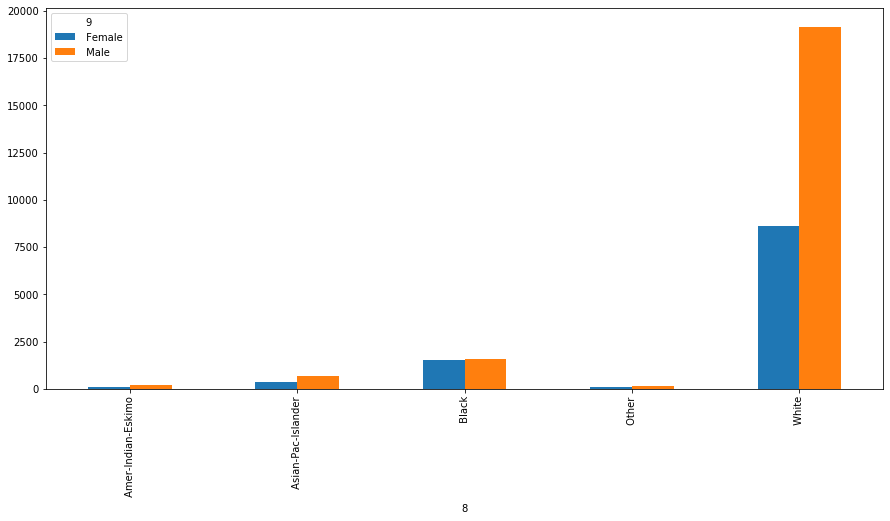

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
df.groupby([8, 9]).count()[12].unstack().plot.bar(ax=ax)

#### <div id='plot_kde'>kde</div>
[```DataFrame.plot.kde(bw_method=None, ind=None, **kwargs)[source]```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html#pandas.DataFrame.plot.kde)

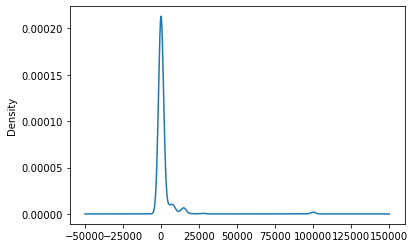

In [31]:
df[df['education']==' Bachelors']['capital-gain'].plot.kde()

## <div id='test'>Testing</div>

Here some good practices I learnt on my skin are collected.

### <div id='testoriginal'>Test the mutation of the original DF if you need it</div>

Some pandas method are mutators, thus they will affect your dataframe provided as an argument to your transformation functions.

### <div id='testindex'>Test the Index robustness to shuffling</div>
```assert function(df.sample(frac=1)) == expected```

Many times, using functions based on the index (```.at```, ```.loc```, ```.iloc```, ```.reset_index```,..) you may generate a new row without even notice it, because of Pandas filling a not already present index. In order to avoid it you can test your functions on shuffling.

In [49]:
def func(df):
    #df = dfIn.copy()
    for c in df.columns:
        df.at[0,c] = [1,2,3]
    return df.loc[0]

df = pd.DataFrame({
        'one':  ['Ugo', 'Giovanna', 'Ugo', 'Daniela', 'Ugo'],
        'two':  [1, 2, 5, 2, 0],
    }, dtype=object)
df

,one,two
0,Ugo,1
1,Giovanna,2
2,Ugo,5
3,Daniela,2
4,Ugo,0


Notice the Index. It contains a range **from 0** to 4.

In [50]:
df_out = func(df)
df_out

one    [1, 2, 3]
two    [1, 2, 3]
Name: 0, dtype: object

Now let's suppose to get a previously transformed DF, with a survived Index.

In [51]:
df.index = np.random.randint(0,100,len(df))
df

,one,two
17,Ugo,1
46,Giovanna,2
68,Ugo,5
52,Daniela,2
31,Ugo,0


In [52]:
df_out = func(df)
df_out

one    [1, 2, 3]
two    [1, 2, 3]
Name: 0, dtype: object

In [55]:
df

,one,two
17,Ugo,1
46,Giovanna,2
68,Ugo,5
52,Daniela,2
31,Ugo,0


Can you see how it affected the df?

In [56]:
len(df) == len(df_out)

False

In [57]:
pd.DataFrame({
        'basket_wins':  ['Ugo', 'Giovanna', 'Ugo', 'Daniela', 'Ugo'],
        'soccer_wins_code':  [1, 2, 5, 2, 0],
        'played_matches': [
            datetime.date(2020,10,12),
            datetime.date(2020, 1,10),
            datetime.date(2020, 1, 8),
            datetime.date(2020, 3,12),
            datetime.date(2020, 1,10),
        ]
    })
df_out = func(df)
#assert len(df_out) == 

SyntaxError: invalid syntax (<ipython-input-57-14a03eb379f5>, line 13)

## <div id ='usecases'>Use cases</div>

### <div id='functionapplication'>Function application</div>

[Tablewise function application, pandas official guide](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=pipe#function-application)

In [3]:
import pandas as pd

In [10]:
def extract_city_name(df):
    """
    Chicago, IL -> Chicago for city_name column
    """
    df['city_name'] = df['city_and_code'].str.split(",").str.get(0)
    return df
    

def add_country_name(df, country_name=None):
    """
    Chicago -> Chicago-US for city_name column
    """
    col = 'city_name'
    df['city_and_country'] = df[col] + country_name
    return df

In [11]:
df_p = pd.DataFrame({'city_and_code': ['Chicago, IL']})
df_p.head()

,city_and_code
0,"Chicago, IL"


In [12]:
(df_p
 .pipe(extract_city_name)
 .pipe(add_country_name, country_name="US"))

,city_and_code,city_name,city_and_country
0,"Chicago, IL",Chicago,ChicagoUS


### <div id='use_analyisis1'>Simple data analysis</div>

In [9]:
import time

In [17]:
import pandas as pd

In [21]:
# https://openflights.org/data.html
url = ds_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd \
    .read_csv(ds_url,
             names= [   'Alcohol', 'Malic acid', 'Ash',
                     'Alcalinity of ash', 'Magnesium',
                     'Total phenols', 'Flavanoids',
                     'Nonflavanoid phenols', 'Proanthocyanins',
                     'Color intensity', 'Hue',
                     'OD280/OD315 of diluted wines',
                     'Proline' 
                    ]
             ) 

df.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [24]:
df = df.reset_index()

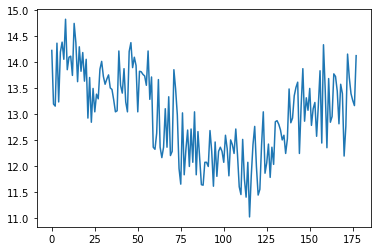

In [25]:
df['Alcohol'].plot()

In [31]:
df[df['Alcohol']<12.5].sort_values('Magnesium', ascending=False)

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.160,2.63,937
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.280,3.07,718
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.060,2.31,750
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.950,2.26,625
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.930,3.69,465
144,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.650,2.00,855
77,2,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.960,2.52,500
117,2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.060,2.96,345
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.750,2.81,562
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.450,2.23,355


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Text(0.5, 1.0, 'Magnesium')

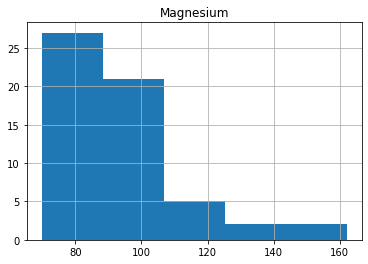

In [41]:
ax = df[df['Alcohol']<12.5]['Magnesium'].hist(bins=5)
ax.set_title('Magnesium')

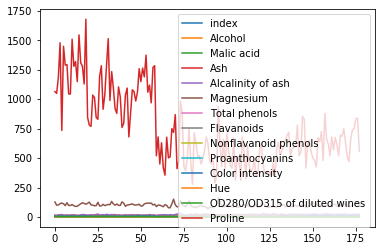

In [42]:
df.plot()

In [43]:
import seaborn as sns

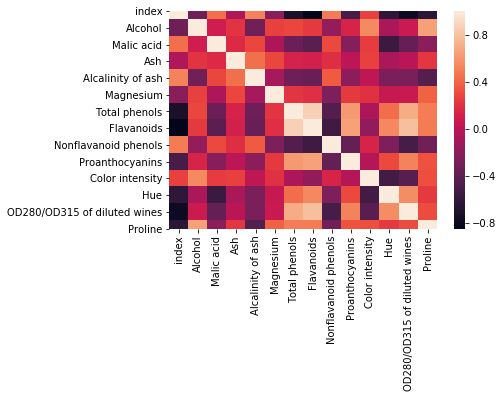

In [51]:
sns.heatmap(df.corr())

In [ ]:
ax_cluster_map = sns.clustermap(df.corr())

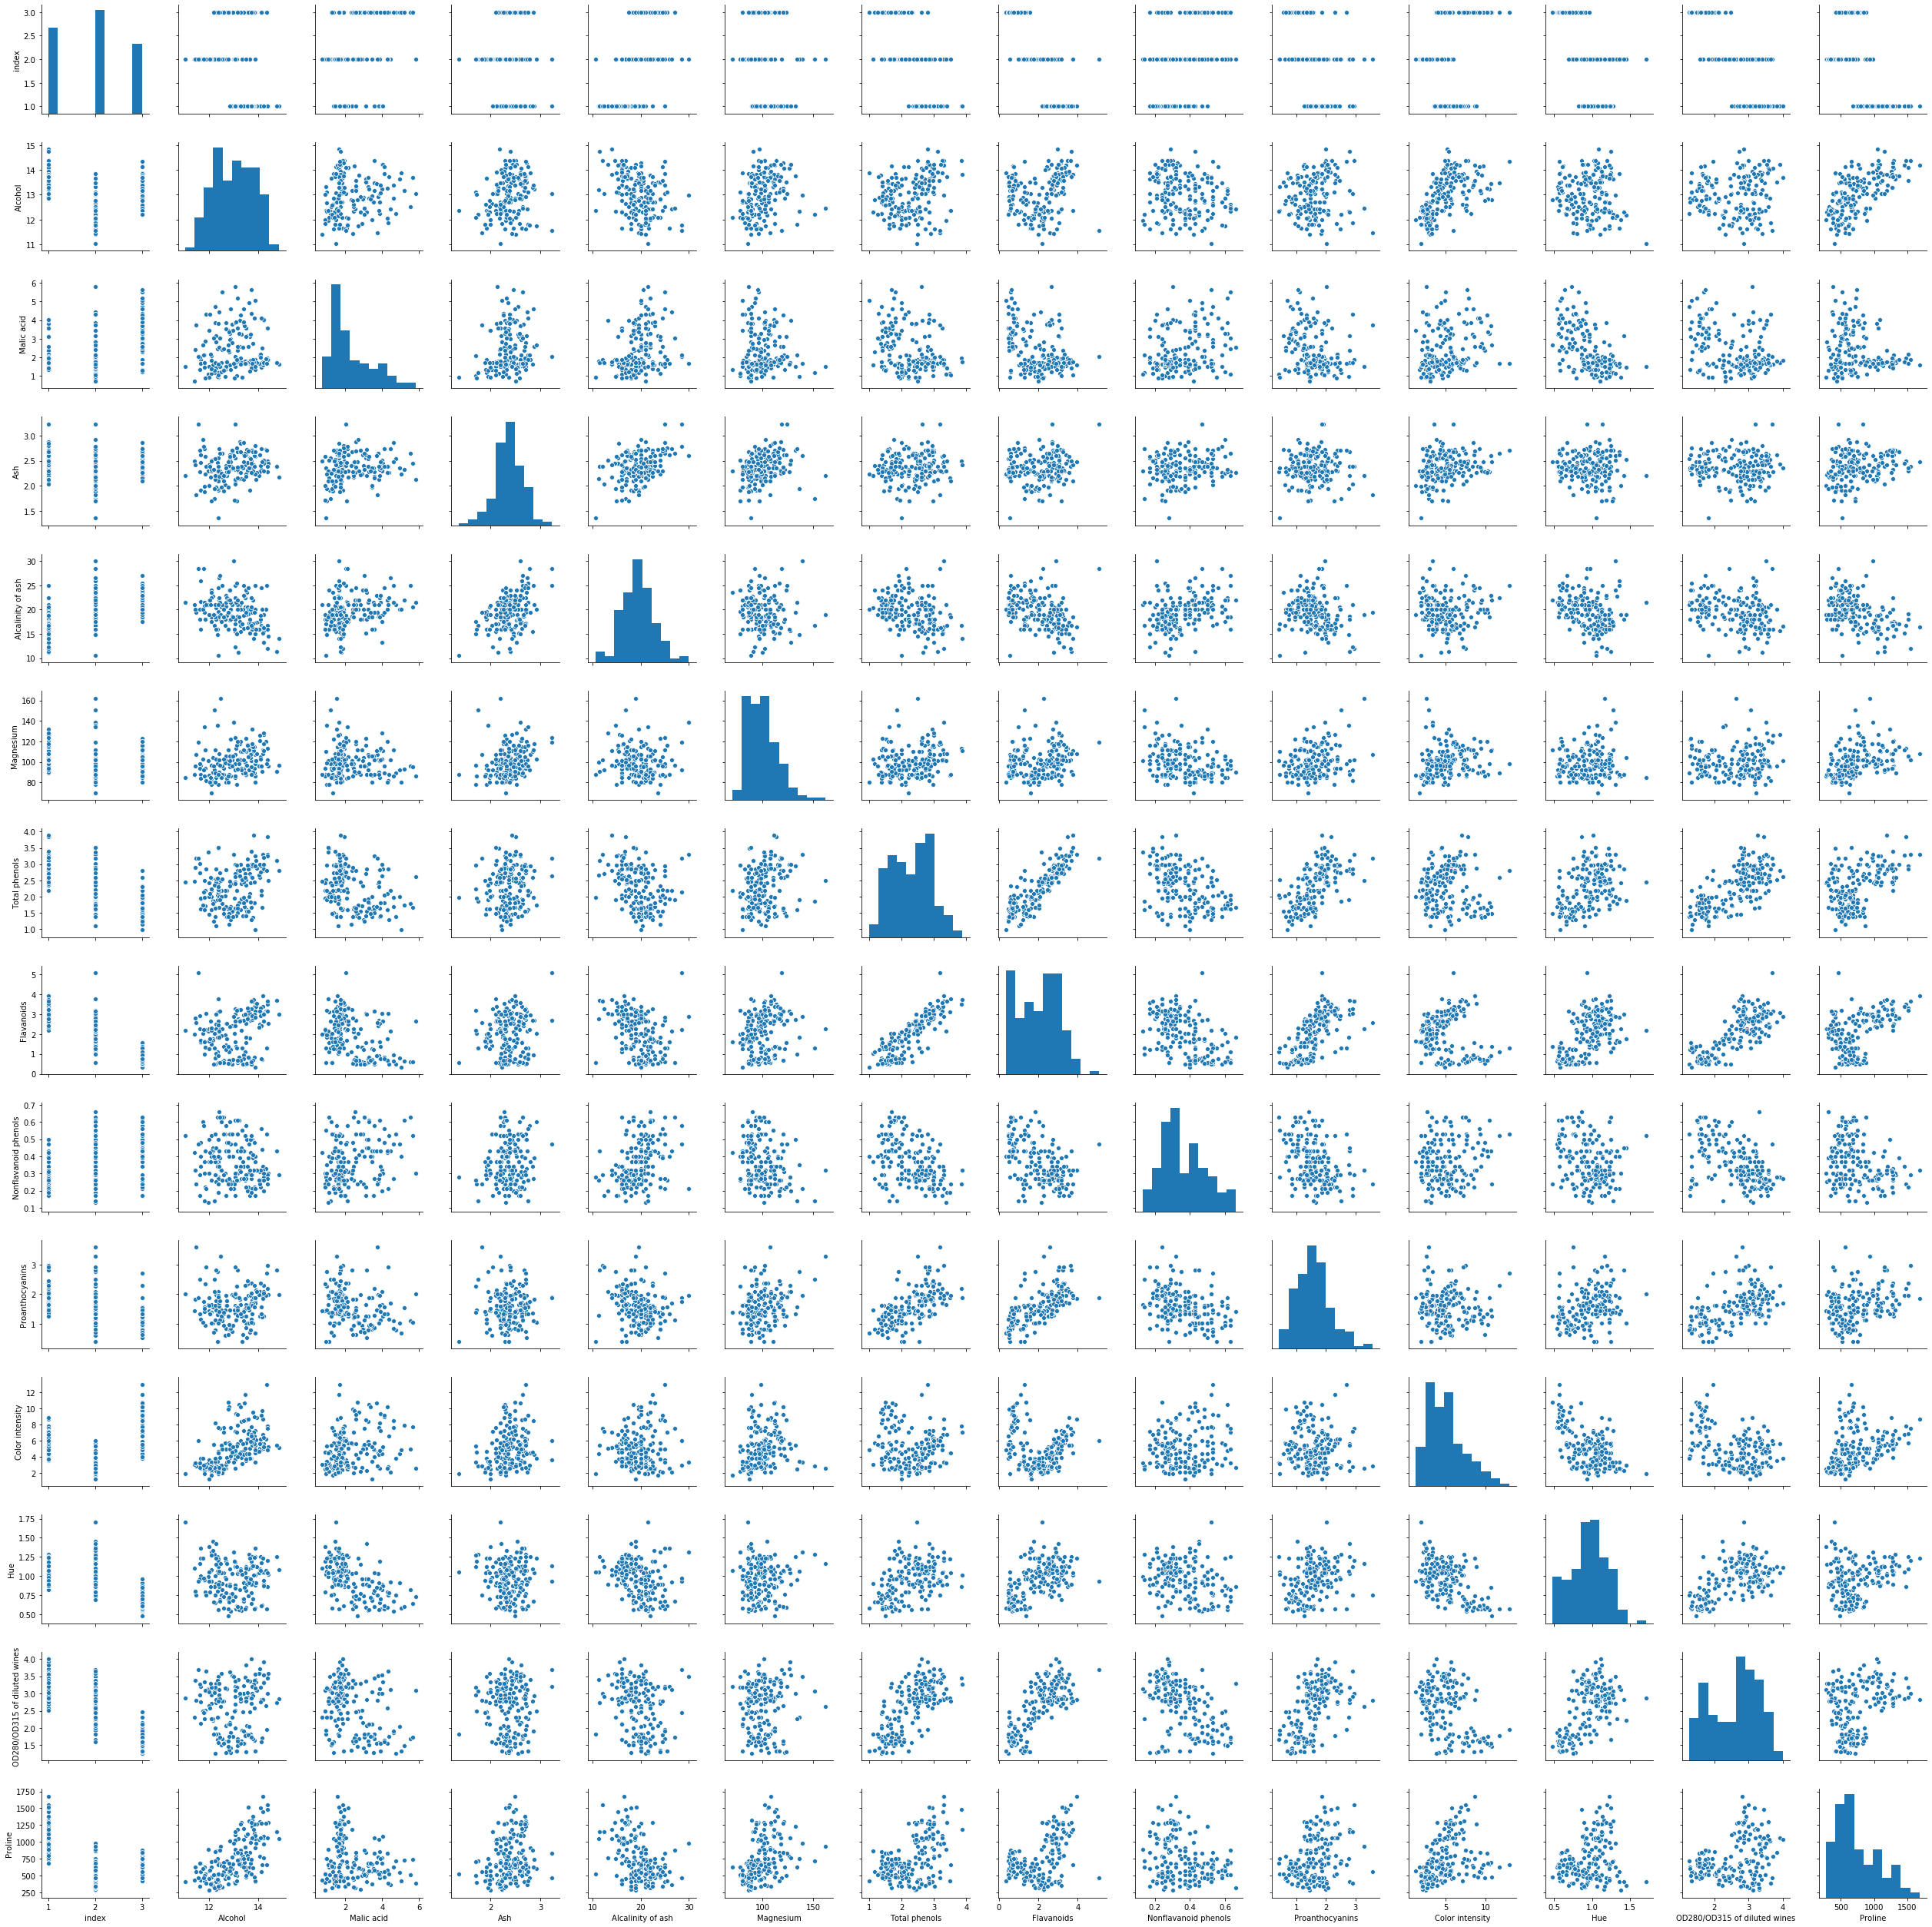

In [44]:
ax_pair_grid = sns.corr(df)

## <div id='dev'>Development</div>

### <div id='dev_extension'>Extending Pandas</div>

https://pandas.pydata.org/pandas-docs/stable/development/extending.html

In [4]:
import pandas as pd
import numpy as np

@pd.api.extensions.register_dataframe_accessor("geo")
class GeoAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj

    @staticmethod
    def _validate(obj):
        # verify there is a column latitude and a column longitude
        if 'latitude' not in obj.columns or 'longitude' not in obj.columns:
            raise AttributeError("Must have 'latitude' and 'longitude'.")

    @property
    def center(self):
        # return the geographic center point of this DataFrame
        lat = self._obj.latitude
        lon = self._obj.longitude
        return (float(lon.mean()), float(lat.mean()))

    def plot(self):
        # plot this array's data on a map, e.g., using Cartopy
        pass

/Users/anggia/opt/anaconda3/envs/py37ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: registration of accessor <class '__main__.GeoAccessor'> under name 'geo' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexistingattribute with the same name.
  after removing the cwd from sys.path.


In [5]:
ds = pd.DataFrame({'longitude': np.linspace(0, 10),
                   'latitude': np.linspace(0, 20)})
print(ds.geo.center)

ds.geo.plot()

(5.0, 10.0)
